### Goals


Plot1 - visibility moon separation   
Plot separation at y axis in degrees 

In [2]:
from astropy.time import Time
from astroplan import download_IERS_A 
import pandas as pd

from astropy.coordinates import EarthLocation
from astroplan import Observer,FixedTarget
import astroplan
from astroplan.plots import plot_airmass,plot_altitude
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import common_timezones
import pyorbital

pd.set_option("display.max_rows", None, "display.max_columns", None)

%matplotlib inline

In [3]:
#common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [4]:
download_IERS_A()


### Setting up target(s)

In [5]:
hydraA=FixedTarget.from_name("Hydra_A")   
#selecting target  - Hydra_A
Ra,Dec=hydraA.ra,hydraA.dec                 #Extracting RA and Dec  since not manually imputed 
print(hydraA,Ra, Dec)                                #Checking if correct values were loaded



<FixedTarget "Hydra_A" at SkyCoord (ICRS): (ra, dec) in deg (139.52354583, -12.09555278)> 139d31m24.765s -12d05m43.99s


In [8]:
start_obs = Time('2020-11-21 12:00:00')
end_obs= Time('2020-11-22 4:00:00')
delta_t = end_obs - start_obs
observe_time = start_obs + delta_t*np.linspace(0, 1,75)

### Setting up observatory locations

In [9]:
ctio = Observer.at_site("ctio", timezone = 'America/Santiago')
print(ctio)

kmtnet = Observer.at_site("Siding Spring Observatory", name='KMTNET',timezone = 'Australia/Sydney')
print(kmtnet)


location_meerkat = EarthLocation.from_geodetic(21.44407*u.deg,-30.71369*u.deg,1050*u.m)
meerkat= Observer(location=location_meerkat, name="MeerKaT", timezone='Africa/Johannesburg')
print(meerkat)


location_askap = EarthLocation.from_geodetic(116.637*u.deg,-26.696*u.deg,377.83*u.m)
askap = Observer(location=location_askap, name="ASKAP", timezone='Australia/Perth')
print(askap)

<Observer: name='ctio',
    location (lon, lat, el)=(-70.81500000000001 deg, -30.165277777777778 deg, 2214.9999999993697 m),
    timezone=<DstTzInfo 'America/Santiago' LMT-1 day, 19:17:00 STD>>
<Observer: name='KMTNET',
    location (lon, lat, el)=(149.06119444444445 deg, -31.273361111111104 deg, 1149.0000000015516 m),
    timezone=<DstTzInfo 'Australia/Sydney' LMT+10:05:00 STD>>
<Observer: name='MeerKaT',
    location (lon, lat, el)=(21.44407 deg, -30.71369000000001 deg, 1049.999999999732 m),
    timezone=<DstTzInfo 'Africa/Johannesburg' LMT+1:52:00 STD>>
<Observer: name='ASKAP',
    location (lon, lat, el)=(116.63699999999999 deg, -26.696000000000005 deg, 377.8299999988001 m),
    timezone=<DstTzInfo 'Australia/Perth' LMT+7:43:00 STD>>


hydraA_coord = SkyCoord(ra=139.5235458*u.deg, dec=-12.0955528*u.deg)
target = FixedTarget(coord=sirius_coord, name="Sirius")

### Setting up times and dates

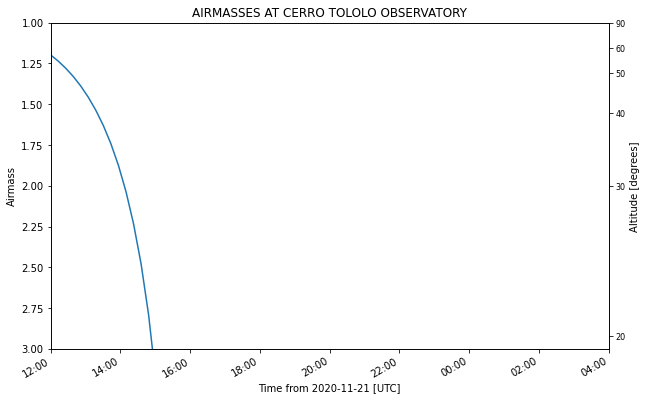

In [10]:
plt.figure(figsize=(10,6))  #Plotting Airmasses and Elevations RA and DEC of Hydra A for a given date 2020-11-11

plot_airmass(hydraA, ctio, observe_time, brightness_shading=True,altitude_yaxis=True)

plt.title('AIRMASSES AT CERRO TOLOLO OBSERVATORY',fontsize=12)
plt.xlabel('TIMES',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

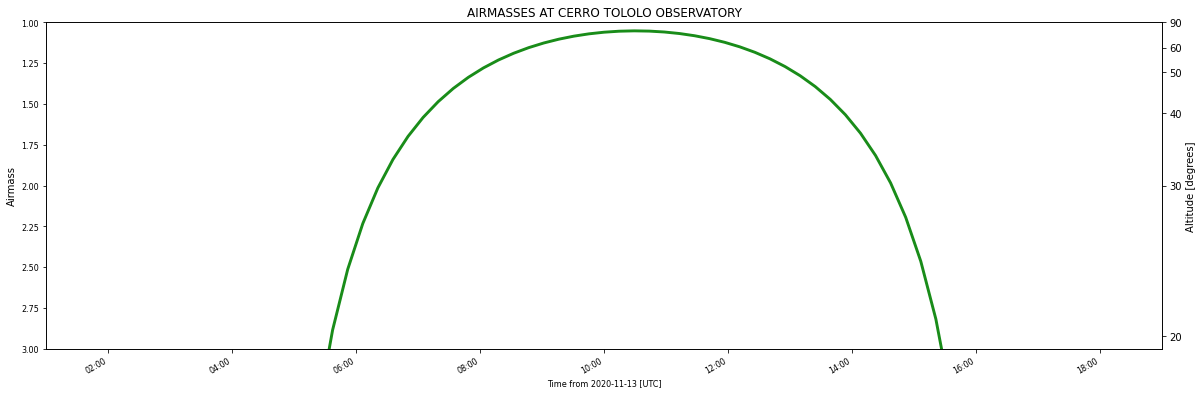

In [11]:
 #Plotting Airmasses and Elevations RA and DEC of Hydra A for a given date date range 
    
start_obs = Time('2020-11-13 01:00:00')
end_obs= Time('2020-11-13 19:00:00')
delta_t = end_obs - start_obs
observe_time2 = start_obs + delta_t*np.linspace(0, 1,75)
plt.figure(figsize=(20,6))  #Plotting Airmasses and Elevations RA and DEC of Hydra A for a given date 2020-11-11
styles = {'linestyle': '-', 'color': 'g', 'alpha': 0.9, 'linewidth': 2.9 } 
plt.title('AIRMASSES AT CERRO TOLOLO OBSERVATORY',fontsize=12)
plt.xlabel('TIMES',fontsize=8)
plt.xticks(fontsize=8)

plt.yticks(fontsize=8)
observe_time2 = start_obs + delta_t*np.linspace(0, 1,75)
plot_airmass(hydraA, ctio, observe_time2, altitude_yaxis=True,style_kwargs=styles)
plt.show()

plt.figure(figsize=(50,20)) 

#x coordinates for the lines
xcoords = [sunset_ctio,sunrise_ctio,moonrise_ctio,moonset_ctio,twilight_morning_ctio,twilight_evening_ctio,
     sunset_kmtnet,sunrise_kmtnet,moonrise_kmtnet,moonset_kmtnet,twilight_morning_kmtnet,twilight_evening_kmtnet
          
          
          
          ]
#colors for the lines
colors = ['r','k','b','g','c','m','y','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc,label=('observatory'+xc), c=c)
plt.xlabel('DATETIMES',fontsize=40)
plt.xticks(fontsize=16)
#plt.ylabel('AIRMASSES',fontsize=40)
plt.yticks(fontsize=40)
plt.legend( loc=1, prop={'size': 20})
plt.show()

In [12]:
#Time Range

start_obs = Time('2020-11-17 01:00:00')
end_obs= Time('2020-11-18 19:00:00')
delta_t = end_obs - start_obs
observe_time = start_obs + delta_t*np.linspace(0, 1,75)

In [13]:
#Crude but should work

hydraA2=FixedTarget.from_name("Hydra_A", name='HydraA @CTIO')  
hydraA3=FixedTarget.from_name("Hydra_A", name='HydraA @KMTNET')
hydraA4=FixedTarget.from_name("Hydra_A", name='HydraA @MEERKAT')
hydraA5=FixedTarget.from_name("Hydra_A", name='HydraA @ASKAP')

print(moonrise_meerkat)
x=Time('2020-11-13 20:00:39.008')
x=x.iso

In [14]:
ctio_styles = {'linestyle': '-', 'color': 'r', 'alpha': 0.9, 'linewidth': 2.9 } #lINES STYLES 

In [15]:
start_obs = Time('2020-11-21 12:00:00')
end_obs= Time('2020-11-22 4:00:00')
delta_t = end_obs - start_obs
observe_time1 = start_obs + delta_t*np.linspace(0, 1,75)

In [19]:
#generate date times
from astropy.coordinates import get_moon

start_obs = Time('2020-11-21 12:00:00')
end_obs= Time('2020-11-22 4:00:00')
delta_t = end_obs - start_obs
observe_timemoon = start_obs + delta_t*np.linspace(0, 1,75)
#bserve_timemoon

#Define the source 
HydraAs = SkyCoord('139d31m24.765s', '-12d05m43.99s', frame='icrs')


#Generate moon positions 
moon_radec=[]
for i in observe_timemoon:
    get_moon(i)
    moon_radec.append(get_moon(i))

    
#convert them to radec format   

radecs=[]
for i in moon_radec:
    c = SkyCoord(ra=i.ra, dec=i.dec)
    radecs.append(c.to_string('hmsdms'))
    
#Splitting them
radec2=[]
for e in radecs:
    radec2.append(e.split(' '))
    
    
#Conveting to degrees
moon_locs=[]
l=np.arange(0,len(radec2))
for i in (l):
    moon_locs.append(SkyCoord(radec2[i][0],radec2[i][1], frame='icrs'))

#Get seperations in degrees

sep=[]
for i in moon_locs:
    sep.append(HydraAs.separation(i).deg)
#making them numpy arrays
sep=np.array(sep)   

observe_timemoon=np.array(observe_timemoon.datetime)


In [20]:
time=np.array(observe_time1.datetime)

In [22]:
#observe_timex

Text(0, 0.5, 'Seperation')

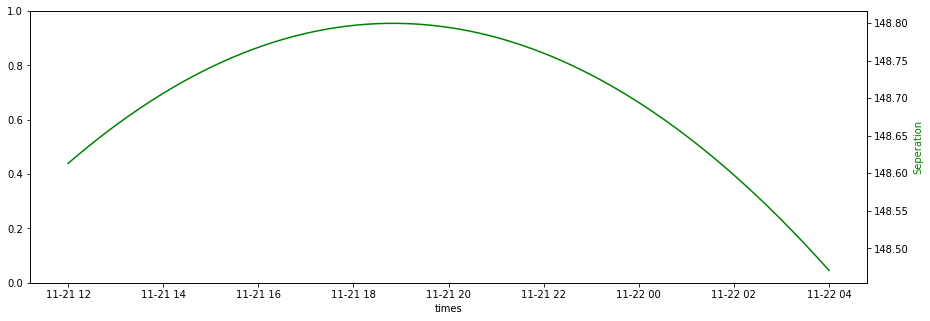

In [24]:

#ax.figure(figsize=(15,5))

y= np.arange(0, 75)


fig, ax1 = plt.subplots(figsize=(15,5))

ax2 = ax1.twinx()

ax2.plot(time, sep, 'g-')




#ax1.plot(observe_timemoon, y, 'b-')

ax1.set_xlabel('times')
#ax1.set_ylabel('Airmasses', color='b')
ax2.set_ylabel('Seperation', color='g')



plt.figure(figsize=(15,5))

#ax2 = ax1.twinx()
plt.plot(observe_timex,sep,label='Moonseperation from source in degrees')
#ax2.

#plot_airmass(hydraA2, askap, observe_timex ,style_kwargs=askap_styles2)

#plt.plot(observe_timemoon,sep,label='Moonseperation from source in degrees')
plt.xlabel('Times',fontsize=15)
plt.ylabel('Mooon seperation in degrees',fontsize=12)
plt.axis('tight')
plt.grid()

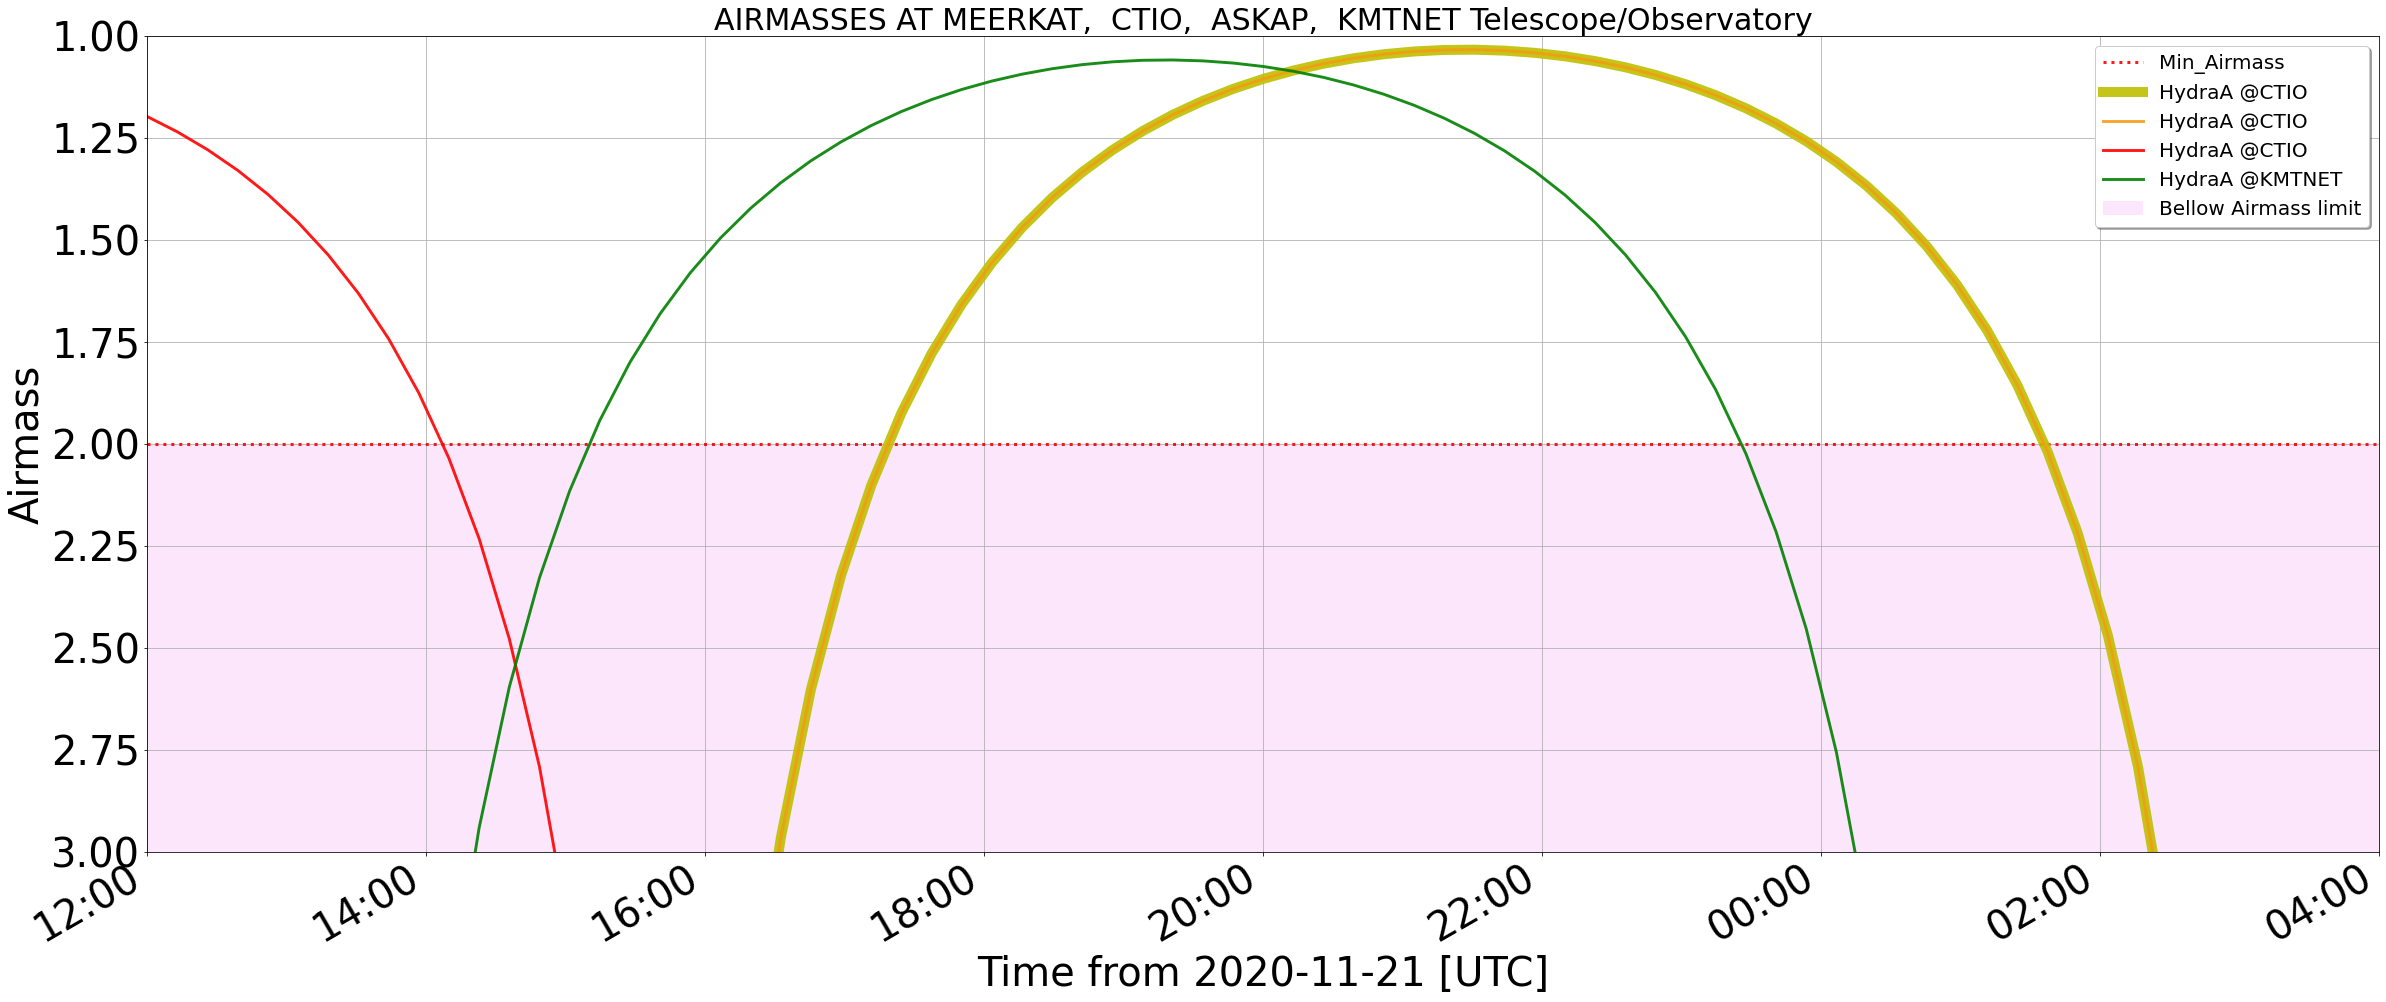

In [25]:
 #Plotting Airmasses and Elevations RA and DEC of Hydra A for a given date date range 
#print(observe_time2)
#print(moonrise_ctio)

plt.figure(figsize=(40,15))  #Plotting Airmasses and Elevations RA and DEC of Hydra A for a given date 2020-11-11


ctio_styles = {'linestyle': '-', 'color': 'r', 'alpha': 0.9, 'linewidth': 2.9 } #lINES STYLES 
kmtnet_styles = {'linestyle': '-', 'color': 'g', 'alpha': 0.9, 'linewidth': 2.9 } 
meerkat_styles = {'linestyle': '-', 'color': 'b', 'alpha': 0.9, 'linewidth': 2.9 }    
askap_styles = {'linestyle': '-', 'color': '#F39C12', 'alpha': 0.9, 'linewidth': 2.9 }    
askap_styles2 = {'linestyle': '-', 'color': 'y', 'alpha': 0.9, 'linewidth':10}   
    
plt.title('AIRMASSES AT' +' '+ meerkat.name.upper() + ',  '+ ctio.name.upper()+ ',  '+ askap.name.upper()+',  '+ kmtnet.name.upper()+''+' Telescope/Observatory',fontsize=30)
plt.xlabel('TIMES',fontsize=40)
plt.xticks(fontsize=40)
plt.ylabel('AIRMASSES',fontsize=40)
plt.yticks(fontsize=40)



#plt.axvline(x=moonrise_meerkat,color='blue',linestyle='-', label='Moonrise',alpha=0.9)
#Plotting airmasses 
plt.axhline(2,color='r',linestyle=':',linewidth=3, label='Min_Airmass',alpha=0.9)
plot_airmass(hydraA2, askap, observe_time1 ,style_kwargs=askap_styles2)
plot_airmass(hydraA2, askap, observe_time1,style_kwargs=askap_styles)
plot_airmass(hydraA2, ctio, observe_time1,style_kwargs=ctio_styles)
plot_airmass(hydraA3, kmtnet, observe_time1, style_kwargs=kmtnet_styles)
#plot_airmass(hydraA4, meerkat, observe_time2, style_kwargs=meerkat_styles)

plt.axhspan(3, 2, facecolor='violet', alpha=0.2,label='Bellow Airmass limit')
#plt.plot(moonphase,label='moonphase')


#plt.axvline(x=x,color='blue',linestyle='-', label='Moonrise',alpha=0.9)
#plt.axvline(x=moonset_kmtnet,color='purple',linestyle='-',linewidth=2.3, label='Moonset',alpha=0.9)


#plt.axvline(x=sunrise_CT,color='orange',linestyle='-',label='Sunrise',alpha=0.9)
plt.legend(shadow=True, loc=1, prop={'size': 20})
plt.grid()
plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator


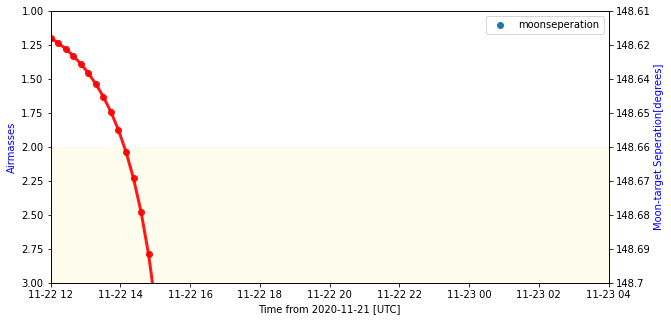

In [35]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

from collections import Sequence
import operator

import matplotlib.pyplot as plt
from matplotlib import dates



time = Time(time)
if time.isscalar:
    time = time + np.linspace(-12, 12, 100)*u.hour
elif len(time) == 1:
    warnings.warn('You used a Time array of length 1.  You probably meant '
                      'to use a scalar. (Or maybe a list with length > 1?).',
                      PlotWarning)
if not isinstance(hydraA2, Sequence):
        hydraA2 = [hydraA2]
observer=ctio
for target in hydraA2:
        # Calculate airmass
        airmass = observer.altaz(time, hydraA2).secz
        # Mask out nonsense airmasses
        masked_airmass = np.ma.array(airmass, mask=airmass < 1)
        
#len(masked_airmass)


# Some checks & info for labels.
        try:
            target_name = hydraA2.name
        except AttributeError:
            target_name = ''
            
fig, ax = plt.subplots(figsize=(10,5))
            
#ax = plt.gca()

style_kwargs = {'linestyle': '-', 'color': 'r', 'alpha': 0.9, 'linewidth': 3 }
style_kwargs = dict(style_kwargs)
        # Plot data

ax.plot_date(time.plot_date, masked_airmass, label=target_name,**style_kwargs )


# Format the time axis
ax.set_xlim([time[0].plot_date, time[-1].plot_date])
date_formatter = dates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_formatter)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

 # Invert y-axis and set limits.
y_lim = ax.get_ylim()
if y_lim[1] > y_lim[0]:
    ax.invert_yaxis()
    ax.set_ylim([3, 1])
    
    # Draw lo/hi limit regions, if present
ymax, ymin = ax.get_ylim()       # should be (hi_limit, lo_limit)


min_region=1.3
max_region=2


ax.axhspan(ymax, max_region, facecolor='#F9EB4E', alpha=0.10)
#if min_region is not None:
  #  ax.axhspan(min_region, ymin, facecolor='#F9EB4E', alpha=0.10)
    
ax.set_xlabel("Time from {0} [UTC]".format(min(time).datetime.date()))

ax.set_ylabel('Airmasses', color='b')

#if _has_twin(ax):
#altitude_ticks = np.array([90, 60, 50, 40, 30, 20])
altitude_ticks =np.round(sep,2)
#airmass_ticks = 1./np.cos(np.radians(90 - altitude_ticks))
ax2 = ax.twinx()

ax2.plot_date(y, sep, label='moonseperation' )
     
ax2.invert_yaxis()

#ax2.set_yticks(airmass_ticks)
#ax2.plot_date(time.plot_date, sep, label='moonseperation' )
ax2.set_yticklabels(altitude_ticks)
ax2.set_ylim(ax.get_ylim())
ax2.set_ylabel('Moon-target Seperation[degrees]',color='b')
ax2.legend()
#|ax.plot(xx, sep)

In [515]:
xx=np.array(observe_timemoon)

Text(0, 0.5, 'Seperation')

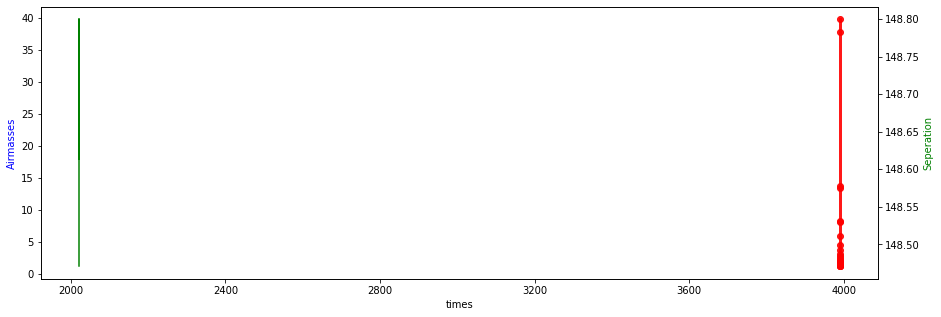

In [524]:
fig, ax1 = plt.subplots(figsize=(15,5))
y= np.arange(0, 75)
ax2 = ax1.twinx()

ax2.plot(observe_timemoon, sep, 'g-')

#ax1.plot_date(time.plot_date, masked_airmass, label=target_name)
ax1.plot_date(time.plot_date, masked_airmass, label=target_name,**style_kwargs )
#ax1.plot(observe_timemoon, y, 'b-')

ax1.set_xlabel('times')
ax1.set_ylabel('Airmasses', color='b')
ax2.set_ylabel('Seperation', color='g')


In [34]:

from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
from collections import Sequence
import operator
def plot_airmass3(targets, observer, time, ax=None, style_kwargs=None,
                 altitude_yaxis=False, min_airmass=1.0, min_region=None,
                 max_airmass=3.0, max_region=None):
    
    # Import matplotlib, set style sheet
    #if style_sheet is not None:
       # _set_mpl_style_sheet(style_sheet)

    import matplotlib.pyplot as plt
    from matplotlib import dates

    # Set up plot axes and style if needed.
    if ax is None:
        ax = plt.gca()
    if style_kwargs is None:
        style_kwargs = {}
    style_kwargs = dict(style_kwargs)
    style_kwargs.setdefault('linestyle', '-')
    style_kwargs.setdefault('linewidth', 1.5)
    style_kwargs.setdefault('fmt', '-')

    # Populate time window if needed.
    time = Time(time)
    if time.isscalar:
        time = time + np.linspace(-12, 12, 100)*u.hour
    elif len(time) == 1:
        warnings.warn('You used a Time array of length 1.  You probably meant '
                      'to use a scalar. (Or maybe a list with length > 1?).',
                      PlotWarning)

    if not isinstance(targets, Sequence):
        targets = [targets]

    for target in targets:
        # Calculate airmass
        airmass = observer.altaz(time, target).secz
        # Mask out nonsense airmasses
        masked_airmass = np.ma.array(airmass, mask=airmass < 1)

        # Some checks & info for labels.
        try:
            target_name = target.name
        except AttributeError:
            target_name = ''

        # Plot data
        ax.plot_date(time.plot_date, masked_airmass, label=target_name, **style_kwargs)
        
    # Format the time axis
    ax.set_xlim([time[0].plot_date, time[-1].plot_date])
    date_formatter = dates.DateFormatter('%H:%M')
    #ax.xaxis.set_major_formatter(date_formatter)
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

   
    # Invert y-axis and set limits.
    y_lim = ax.get_ylim()
    if y_lim[1] > y_lim[0]:
        ax.invert_yaxis()
    ax.set_ylim([max_airmass, min_airmass])
    
    ax.axhline(2,color='purple',linestyle='-',linewidth=2.3, label='Moonset',alpha=0.9)
    
    # Draw lo/hi limit regions, if present
    ymax, ymin = ax.get_ylim()       # should be (hi_limit, lo_limit)

    if max_region is not None:
        ax.axhspan(ymax, max_region, facecolor='#F9EB4E', alpha=0.10)
    if min_region is not None:
        ax.axhspan(min_region, ymin, facecolor='#F9EB4E', alpha=0.10)

    # Set labels.
    ax.set_ylabel("Airmass")
    ax.set_xlabel("Time from {0} [UTC]".format(min(time).datetime.date()))

    if altitude_yaxis and not _has_twin(ax):
        altitude_ticks = np.array([90, 60, 50, 40, 30, 20])
        airmass_ticks = 1./np.cos(np.radians(90 - altitude_ticks))

        ax2 = ax.twinx()
        
        ax2.invert_yaxis()
        ax2.set_yticks(airmass_ticks)
        ax2.set_yticklabels(altitude_ticks)
        ax2.set_ylim(ax.get_ylim())
        ax2.set_ylabel('Altitude [degrees]')

    # Redraw figure for interactive sessions.
    ax.figure.canvas.draw()

    # Output.
    return ax

<AxesSubplot:xlabel='Time from 2020-11-21 [UTC]', ylabel='Airmass'>

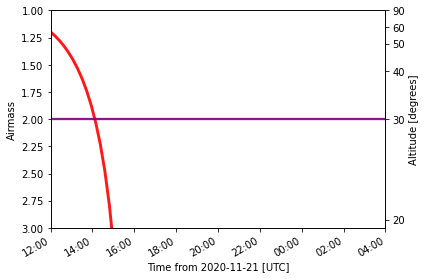

In [419]:
plot_airmass3(hydraA2, ctio, time,style_kwargs=ctio_styles,altitude_yaxis=True)

In [ ]:
 # Shade background during night time
    if brightness_shading:
        start = time[0].datetime

        # Calculate and order twilights and set plotting alpha for each
        twilights = [
            (observer.sun_set_time(Time(start), which='next').datetime, 0.0),
            (observer.twilight_evening_civil(Time(start), which='next').datetime, 0.1),
            (observer.twilight_evening_nautical(Time(start), which='next').datetime, 0.2),
            (observer.twilight_evening_astronomical(Time(start), which='next').datetime, 0.3),
            (observer.twilight_morning_astronomical(Time(start), which='next').datetime, 0.4),
            (observer.twilight_morning_nautical(Time(start), which='next').datetime, 0.3),
            (observer.twilight_morning_civil(Time(start), which='next').datetime, 0.2),
            (observer.sun_rise_time(Time(start), which='next').datetime, 0.1),
        ]

        twilights.sort(key=operator.itemgetter(0))
        for i, twi in enumerate(twilights[1:], 1):
            ax.axvspan(twilights[i - 1][0], twilights[i][0],
                       ymin=0, ymax=1, color='grey', alpha=twi[1])


In [286]:
#generate date times


start_obs = Time('2020-11-20 12:00:00')
end_obs= Time('2020-11-30 4:00:00')
delta_t = end_obs - start_obs
observe_timemoon = start_obs + delta_t*np.linspace(0, 1,75)
#bserve_timemoon

#Define the source 
HydraAs = SkyCoord('139d31m24.765s', '-12d05m43.99s', frame='icrs')


#Generate moon positions 
moon_radec=[]
for i in observe_timemoon:
    get_moon(i)
    moon_radec.append(get_moon(i))

    
#convert them to radec format   

radecs=[]
for i in moon_radec:
    c = SkyCoord(ra=i.ra, dec=i.dec)
    radecs.append(c.to_string('hmsdms'))
    
#Splitting them
radec2=[]
for e in radecs:
    radec2.append(e.split(' '))
    
    
#Conveting to degrees
moon_locs=[]
l=np.arange(0,len(radec2))
for i in (l):
    moon_locs.append(SkyCoord(radec2[i][0],radec2[i][1], frame='icrs'))

#Get seperations in degrees

sep=[]
for i in moon_locs:
    sep.append(HydraAs.separation(i).deg)
#making them numpy arrays
sep=np.array(sep)   

observe_timemoon=np.array(observe_timemoon.datetime)


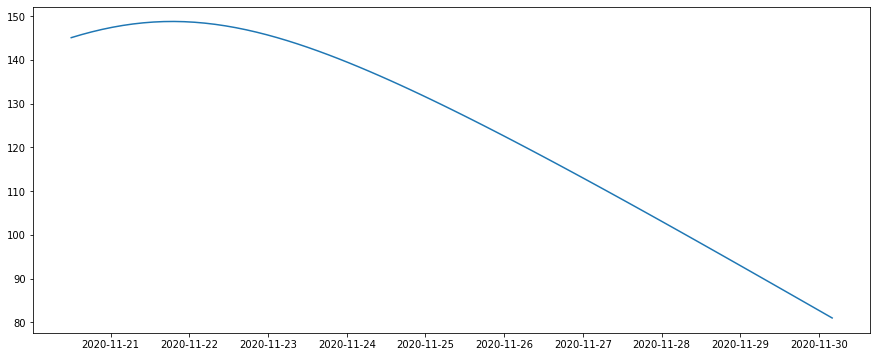

In [307]:
plt.figure(figsize=(15,6)) 

plt.plot(observe_timemoon,sep)

In [ ]:
import operator
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
from collections import Sequence

def plot_airmass3(targets, observer, time, ax=None, style_kwargs=None,
                 style_sheet=None, brightness_shading=False,
                 altitude_yaxis=False, min_airmass=1.0, min_region=None,
                 max_airmass=3.0, max_region=None):
    
    # Import matplotlib, set style sheet
    if style_sheet is not None:
        _set_mpl_style_sheet(style_sheet)

    import matplotlib.pyplot as plt
    from matplotlib import dates

    # Set up plot axes and style if needed.
    if ax is None:
        ax = plt.gca()
    if style_kwargs is None:
        style_kwargs = {}
    style_kwargs = dict(style_kwargs)
    style_kwargs.setdefault('linestyle', '-')
    style_kwargs.setdefault('linewidth', 1.5)
    style_kwargs.setdefault('fmt', '-')

    # Populate time window if needed.
    time = Time(time)
    if time.isscalar:
        time = time + np.linspace(-12, 12, 100)*u.hour
    elif len(time) == 1:
        warnings.warn('You used a Time array of length 1.  You probably meant '
                      'to use a scalar. (Or maybe a list with length > 1?).',
                      PlotWarning)

    if not isinstance(targets, Sequence):
        targets = [targets]

    for target in targets:
        # Calculate airmass
        airmass = observer.altaz(time, target).secz
        # Mask out nonsense airmasses
        masked_airmass = np.ma.array(airmass, mask=airmass < 1)

        # Some checks & info for labels.
        try:
            target_name = target.name
        except AttributeError:
            target_name = ''

        # Plot data
        ax.plot_date(time.plot_date, masked_airmass, label=target_name, **style_kwargs)
        
    # Format the time axis
    ax.set_xlim([time[0].plot_date, time[-1].plot_date])
    date_formatter = dates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(date_formatter)
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

    # Shade background during night time
    if brightness_shading:
        start = time[0].datetime

        # Calculate and order twilights and set plotting alpha for each
        twilights = [
            (observer.sun_set_time(Time(start), which='next').datetime, 0.0),
            (observer.twilight_evening_civil(Time(start), which='next').datetime, 0.1),
            (observer.twilight_evening_nautical(Time(start), which='next').datetime, 0.2),
            (observer.twilight_evening_astronomical(Time(start), which='next').datetime, 0.3),
            (observer.twilight_morning_astronomical(Time(start), which='next').datetime, 0.4),
            (observer.twilight_morning_nautical(Time(start), which='next').datetime, 0.3),
            (observer.twilight_morning_civil(Time(start), which='next').datetime, 0.2),
            (observer.sun_rise_time(Time(start), which='next').datetime, 0.1),
        ]

        twilights.sort(key=operator.itemgetter(0))
        for i, twi in enumerate(twilights[1:], 1):
            ax.axvspan(twilights[i - 1][0], twilights[i][0],
                       ymin=0, ymax=1, color='grey', alpha=twi[1])

    # Invert y-axis and set limits.
    y_lim = ax.get_ylim()
    if y_lim[1] > y_lim[0]:
        ax.invert_yaxis()
    ax.set_ylim([max_airmass, min_airmass])
    
    ax.axhline(2,color='purple',linestyle='-',linewidth=2.3, label='Moonset',alpha=0.9)
    
    # Draw lo/hi limit regions, if present
    ymax, ymin = ax.get_ylim()       # should be (hi_limit, lo_limit)

    if max_region is not None:
        ax.axhspan(ymax, max_region, facecolor='#F9EB4E', alpha=0.10)
    if min_region is not None:
        ax.axhspan(min_region, ymin, facecolor='#F9EB4E', alpha=0.10)

    # Set labels.
    ax.set_ylabel("Airmass")
    ax.set_xlabel("Time from {0} [UTC]".format(min(time).datetime.date()))

    if altitude_yaxis and not _has_twin(ax):
        altitude_ticks = np.array([90, 60, 50, 40, 30, 20])
        airmass_ticks = 1./np.cos(np.radians(90 - altitude_ticks))

        ax2 = ax.twinx()
        
        ax2.invert_yaxis()
        ax2.set_yticks(airmass_ticks)
        ax2.set_yticklabels(altitude_ticks)
        ax2.set_ylim(ax.get_ylim())
        ax2.set_ylabel('Altitude [degrees]')

    # Redraw figure for interactive sessions.
    ax.figure.canvas.draw()

    # Output.
    return ax

In [ ]:
#frbs=pd.read_csv('frbcat_20201110.csv')
#FRBs=pd.DataFrame(frbs)
#FRBs